# PREPARE DATA & EDA

In [147]:
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/label.txt
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/train.tsv
!wget https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/test.tsv

--2021-06-23 07:26:40--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/label.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173 [text/plain]
Saving to: ‘label.txt.3’

label.txt.3         100%[===================>]     173  --.-KB/s    in 0s      

2021-06-23 07:26:40 (8.73 MB/s) - ‘label.txt.3’ saved [173/173]

--2021-06-23 07:26:41--  https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp-tf2/master/7.PRETRAIN_METHOD/data_in/KOR/NER/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting 

In [148]:
!ls /kaggle/working

__notebook_source__.ipynb  label.txt.1	test.tsv    test.tsv.3	 train.tsv.2
bert_ckpt		   label.txt.2	test.tsv.1  train.tsv	 train.tsv.3
label.txt		   label.txt.3	test.tsv.2  train.tsv.1


In [149]:
import os

DATA_IN_PATH = '/kaggle/working'
DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, 'train.tsv')
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, 'test.tsv')
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, 'label.txt')

In [150]:
def read_file(input_path):
    """
    READ TSV FILE
    return:
        [ words, labels ]
    """
    with open(input_path, "r", encoding='utf-8') as f:
        sentences = []
        labels = []
        for l in f:
            split_line = l.strip().split('\t')
            sentences.append(split_line[0])
            labels.append(split_line[1])
        return sentences, labels 

In [151]:
import pandas as pd

tr_sentences, tr_labels = read_file(DATA_TRAIN_PATH)
te_sentences, te_labels = read_file(DATA_TEST_PATH)
ner_sentences = tr_sentences + te_sentences
ner_labels = tr_labels + te_labels

ner_dict = {"sentence": ner_sentences, "label": ner_labels}
ner_df = pd.DataFrame(ner_dict)

In [152]:
ner_df.head()

,sentence,label
0,"금석객잔 여러분, 감사드립니다 .",ORG-B O O O
1,이기범 한두 쪽을 먹고 10분 후쯤 화제인을 먹는 것이 좋다고 한다 .,PER-B O O O TIM-B TIM-I CVL-B O O O O O
2,7-8위 결정전에서 김중배 무스파타(샌안토니오)가 참은 법국을 누르고 유럽축구선수권...,EVT-B EVT-I PER-B PER-I O LOC-B O EVT-B CVL-B O O
3,스코틀랜드의 한 마을에서 보통하게 살고 있다는 이 기혼 남성의 시조가 유튜브 등에서...,LOC-B NUM-B NUM-I O O O O O O O O O O O O O CV...
4,보니까 저 옆에 사조가 있어요 .,O O O O O O


In [153]:
print(len(ner_df))

90000


In [154]:
"""
PERSON - PER
FIELD - FLD
ARTIFACTS_WORKS - AFW
ORGANIZATION - ORG
LOCATION - LOC
CIVILIZATION - CVL
DATE - DAT
TIME - TIM
NUMBER - NUM
EVENT - EVT
ANIMAL - ANM
PLANT - PLT
MATERIAL - MAT
TERM - TRM
"""

'\nPERSON - PER\nFIELD - FLD\nARTIFACTS_WORKS - AFW\nORGANIZATION - ORG\nLOCATION - LOC\nCIVILIZATION - CVL\nDATE - DAT\nTIME - TIM\nNUMBER - NUM\nEVENT - EVT\nANIMAL - ANM\nPLANT - PLT\nMATERIAL - MAT\nTERM - TRM\n'

In [155]:
import numpy as np

tr_words_counts = ner_df.sentence.apply(lambda x: len(x.split()))
print(f'MAX # of WORDS: {np.max(tr_words_counts):.2f}')
print(f'AVG # of WORDS: {np.mean(tr_words_counts):.2f}')
print(f'STD # of WORDS: {np.std(tr_words_counts):.2f}')
print(f'MEDIAN # of WORDS: {np.median(tr_words_counts):.2f}')
print(f'1th quartile # of WORDS: {np.percentile(tr_words_counts, 25):.2f}')
print(f'3th quartile # of WORDS: {np.percentile(tr_words_counts, 75):.2f}')
print(f'top 99% # of WORDS: {np.percentile(tr_words_counts, 99):.2f}')

MAX # of WORDS: 175.00
AVG # of WORDS: 11.82
STD # of WORDS: 7.03
MEDIAN # of WORDS: 10.00
1th quartile # of WORDS: 7.00
3th quartile # of WORDS: 15.00
top 99% # of WORDS: 35.00


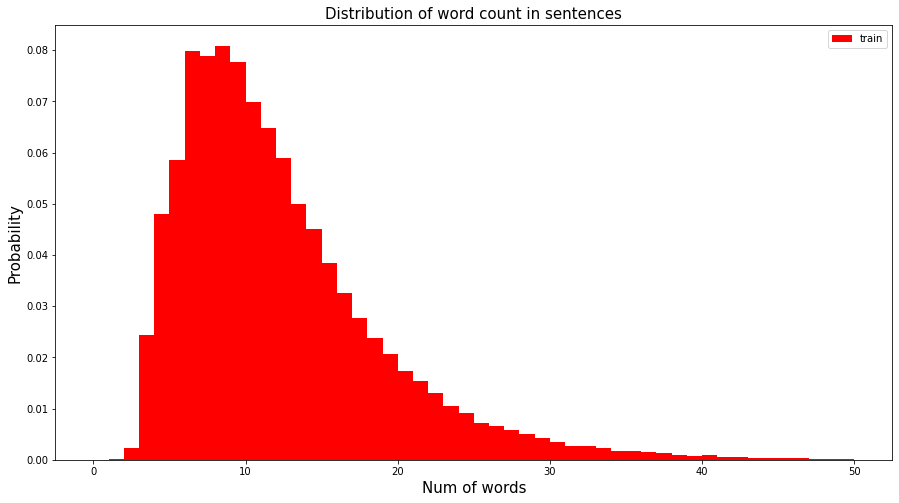

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.hist(tr_words_counts, bins=50, range=[0,50], facecolor='r', density=True, label='train')
plt.title('Distribution of word count in sentences', fontsize=15)
plt.legend()
plt.xlabel('Num of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

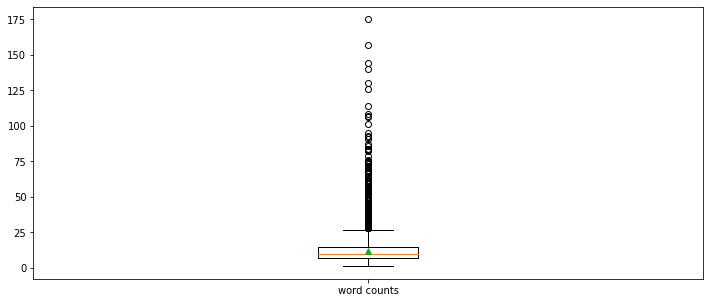

In [157]:
plt.figure(figsize=(12, 5))
plt.boxplot(tr_words_counts, labels=['word counts'], showmeans=True)
plt.show()

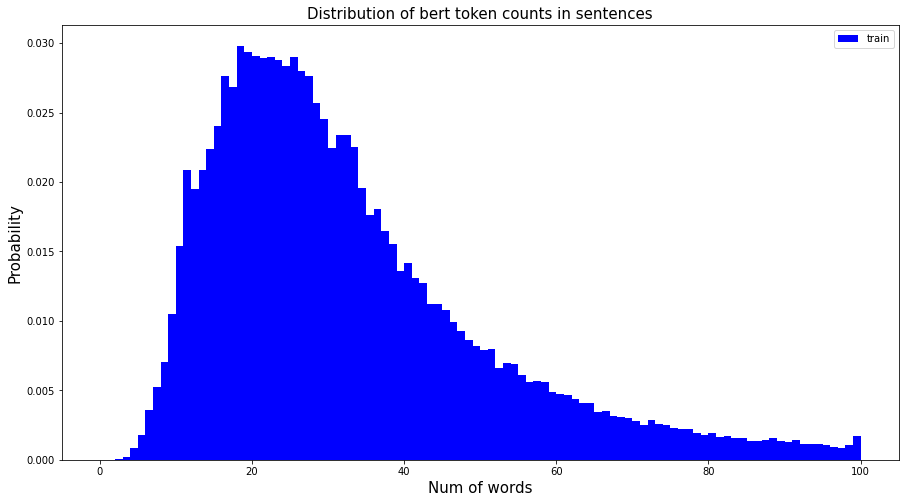

In [158]:
# import huggingface bert tokenizer
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', cache_dir = 'bert_ckpt', do_lower_case = False)
tr_token_counts = ner_df.sentence.apply(lambda x: len(tokenizer.tokenize(x)))

plt.figure(figsize=(15,8))
plt.hist(tr_token_counts, bins=100, range=[0,100], facecolor='b', density=True, label='train')
plt.title('Distribution of bert token counts in sentences', fontsize=15)
plt.legend()
plt.xlabel('Num of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.show()

# PREPROCESSING 

In [159]:
import tensorflow as tf

SEED_NUM = 623
tf.random.set_seed(SEED_NUM)
np.random.seed(SEED_NUM)

BATCH_SIZE = 32
NUM_EPOCHS = 3
MAX_LEN = 111

tr_ner_df = pd.DataFrame({'sentence':tr_sentences, 'label':tr_labels})
te_ner_df = pd.DataFrame({'sentence':te_sentences, 'label':te_labels})

print(f'len of train data: {tr_ner_df.shape[0]}')
print(f'len of test data: {te_ner_df.shape[0]}')

len of train data: 81000
len of test data: 9000


In [160]:
with open(os.path.join(DATA_LABEL_PATH),'r', encoding='utf-8') as f:
    ner_labels = [ l.strip() for l in f ]
print(len(ner_labels))

30


In [161]:
ner_labels

['UNK',
 'O',
 'PER-B',
 'PER-I',
 'FLD-B',
 'FLD-I',
 'AFW-B',
 'AFW-I',
 'ORG-B',
 'ORG-I',
 'LOC-B',
 'LOC-I',
 'CVL-B',
 'CVL-I',
 'DAT-B',
 'DAT-I',
 'TIM-B',
 'TIM-I',
 'NUM-B',
 'NUM-I',
 'EVT-B',
 'EVT-I',
 'ANM-B',
 'ANM-I',
 'PLT-B',
 'PLT-I',
 'MAT-B',
 'MAT-I',
 'TRM-B',
 'TRM-I']

In [162]:
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased", cache_dir='bert_ckpt')
pad_token_id = tokenizer.pad_token_id

cls_token_label_id = 0
sep_token_label_id = 0
pad_token_label_id = 0


In [163]:
def bert_tokenizer(sent, MAX_LEN):
    encoded_dict = tokenizer.encode_plus(
        text = sent,
        truncation = True, 
        add_special_tokens = True,
        max_length = MAX_LEN,
        pad_to_max_length = True,
        return_attention_mask = True
    )
    input_id = encoded_dict['input_ids']
    attention_mask = encoded_dict['attention_mask']
    token_type_id = encoded_dict['token_type_ids']
    
    return input_id, attention_mask, token_type_id

In [164]:
tokenizer.unk_token

'[UNK]'

In [165]:
def convert_label(words, labels_idx, ner_begin_label, max_seq_len):
    """
    convert label for bert tokenizer
    """
    
    tokens = []
    label_ids = []
    
    for word, slot_label in zip(words, labels_idx):
        word_tokens = tokenizer.tokenize(word)
        if not word_tokens:
            word_tokens = [tokenizer.unk_token]
        tokens.extend(word_tokens)
        
        # if B- label
        if int(slot_label) in ner_begin_label:
            # [PER-B, PER-I *len(word_tokens-1)]
            label_ids.extend([int(slot_label)] + [int(slot_label) + 1] * (len(word_tokens)- 1))
        else:
            label_ids.extend([int(slot_label)] * len(word_tokens))
    
    special_tokens_count = 2
    if len(label_ids) > max_seq_len - special_tokens_count:
        label_ids = label_ids[:(max_seq_len - special_tokens_count)]
        
    label_ids += [sep_token_label_id]
    label_ids = [cls_token_label_id] + label_ids
    
    padding_length = max_seq_len - len(label_ids)
    label_ids = label_ids + ([pad_token_label_id] * padding_length)
    
    # labels_ids = [CLS_TOKEN_ID] + [LABEL_IDS] + [SEP_TOKEN_ID] + [PAD_TOKEN_ID]
    return label_ids

In [166]:
ner_begin_label = [ner_labels.index(begin_label) for begin_label in ner_labels if "B" in begin_label]

In [167]:
ner_begin_label

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

In [168]:
import tqdm

def create_inputs_targets(df):
    input_ids = []
    attention_masks = []
    token_type_ids = []
    label_list = []
    for i, data in tqdm.tqdm_notebook(enumerate(df[['sentence','label']].values)):
        sentence, labels = data
        words = sentence.split()
        labels = labels.split()
        labels_idx = []
        
        for label in labels:
            labels_idx.append(ner_labels.index(label) if label in ner_labels else ner_labels.index("UNK"))
        assert len(words) == len(labels_idx)
        input_id, attention_mask, token_type_id = bert_tokenizer(sentence, MAX_LEN)
        convert_label_id = convert_label(words, labels_idx, ner_begin_label, MAX_LEN)
        
        assert len(convert_label_id) == MAX_LEN
        
        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        label_list.append(convert_label_id)
        
        
    input_ids = np.array(input_ids, dtype=int)
    attention_masks = np.array(attention_masks, dtype=int)
    token_type_ids = np.array(token_type_ids, dtype=int)
    label_list = np.asarray(label_list, dtype=int)
    
    inputs = (input_ids, attention_masks, token_type_ids)
    
    return inputs, label_list

tr_inputs, tr_labels = create_inputs_targets(tr_ner_df)
te_inputs, te_labels = create_inputs_targets(te_ner_df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


0it [00:00, ?it/s]

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2074: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


0it [00:00, ?it/s]

In [169]:
print((tr_inputs[0][0]))
print((tr_inputs[1][0]))
print((tr_inputs[2][0]))

[   101   8928  40958 118617 119196  30085  37712    117   8848  12945
  15001  35115  48345    119    102      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [170]:
import transformers

class BertNERClassifier(tf.keras.Model):
    def __init__(self, model_name, dir_path, num_class):
        super(BertNERClassifier, self).__init__()
        
        self.bert = transformers.TFBertModel.from_pretrained(model_name, cache_dir=dir_path)
        self.num_class = num_class
        self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
        self.classifier = tf.keras.layers.Dense(self.num_class, kernel_initializer=tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), name='ner_classifier')
        
    def call(self, inputs, attention_mask=None, token_type_ids=None, training=False):
        outputs = self.bert(inputs, attention_mask=attention_mask, token_type_ids=token_type_ids)
        sequence_output = outputs[0]
        # sequence_output shape = num of sentences x embedding_size(768) x MAX_LEN(111)
        sequence_output = self.dropout(sequence_output, training=training)
        logits = self.classifier(sequence_output)
        # logits shape = num of sentences x num of labels (30) x MAX_LEN(111)
        return logits
        
ner_model = BertNERClassifier(model_name='bert-base-multilingual-cased', dir_path='bert_ckpt', num_class=len(ner_labels))

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [171]:
# img for easy understanding ner bert fine-tuning

![bert_ner_img](https://d33wubrfki0l68.cloudfront.net/a2bdd6105abe97576dac6961fcd79d559f0d513a/3e0e5/images/named-entity-recognition-with-bert_files/bert.png)

In [177]:
def compute_loss(labels, logits):
    """
        reduction desc from tf docs 
        (Optional) Type of tf.keras.losses.Reduction to apply to loss.
        Default value is AUTO. AUTO indicates that the reduction option will be determined by the usage context.
        For almost all cases this defaults to SUM_OVER_BATCH_SIZE. When used with tf.distribute.
        Strategy, outside of built-in training loops such as tf.keras compile and fit, using AUTO or SUM_OVER_BATCH_SIZE will raise an error.
        Please see this custom training tutorial for more details.
    """
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(

        from_logits=True, reduction=tf.keras.losses.Reduction.NONE
        # if reduction set to AUTO(Default) - 111 tags's losses concat to 1 
        # I need to get multiple losses values for 1 batch.
    )
    # when computing 2 sentences's losses, MAX_LEN = 111
    # labels: [[0, 10, 2, 4, 6, 5, 1, 2, 2, 0, 0, 0, ...], [0, 1, 3, 3, 4, 0, ...]] - (2, 111)
    # reshaped labels: [0, 10, 2, 4, 6, 5, ..., 0, 1, 3, 3, 4 ...] - (222, )
    # active_loss : [False, True, True, True ..., False, True, True ... ] = (222, )
    active_loss = tf.reshape(labels, (-1, )) != 0
    # logits: (2, 111, 30)
    # reshaped logits: (222, 30)
    # reduced_logits: (55, 30) [boolean mask remove not important data: 0 label (sep, cls, padding)]
    reduced_logits = tf.boolean_mask(tf.reshape(logits, (-1, logits.shape[2])), active_loss)
    # reduced_labels: (55, )
    labels = tf.boolean_mask(tf.reshape(labels, (-1, )), active_loss)
    return loss_fn(labels, reduced_logits)

# only compute not special tokens's losses 

![f1scoreformula](https://blog.kakaocdn.net/dn/cWPGBF/btqYxqmFbcH/tpWIiUeiqMGPlOCkEI3k4k/img.png)

In [180]:
# https://github.com/chakki-works/seqeval
!pip install seqeval

     |████████████████████████████████| 43 kB 864 kB/s eta 0:00:011
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16170 sha256=0b4b6f852f42299ecb196014ae2d3e95f994f696397fd515029722cb22f4e2ff
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [189]:
from seqeval.metrics import f1_score, precision_score, recall_score, classification_report

class F1_Precision_Recall_Score(tf.keras.callbacks.Callback):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def compute_f1_precision_recall(self, labels, preds):
        assert len(labels) == len(preds)
        return {
            "precision": precision_score(labels, preds, suffix=True),
            "recall": recall_score(labels, preds, suffix=True),
            "f1": f1_score(labels, preds, suffix=True),
        }
        
    def show_report(self, labels, preds):
        return classification_report(labels, preds, suffix=True)
    
    def on_epoch_end(self, epoch, logs=None):
        results = {}
        
        pred = self.model.predict(self.x)
        label = self.y
        pred_argmax = np.argmax(pred, axis=2)
        
        slot_label_map = {i: label for i, label in enumerate(ner_labels)}
        out_label_list = [[] for _ in range(label.shape[0])]
        preds_list = [[] for _ in range(label.shape[0])]
        
        for i in range(label.shape[0]):
            for j in range(label.shape[1]):
                if label[i,j] != 0:
                    out_label_list[i].append(slot_label_map[label[i][j]])
                    preds_list[i].append(slot_label_map[pred_argmax[i][j]])
        result = self.compute_f1_precision_recall(out_label_list, preds_list)
        # update dictionary
        # dict.update(edited_dict)
        results.update(result)
        print('*'*8)
        print('F1 Score')
        for k in sorted(results.keys()):
            print(f"{k}, {results[k]:.4f}")
            print('\n'+self.show_report(out_label_list, preds_list))
            print('*'*8)
custom_score_callback = F1_Precision_Recall_Score(te_inputs, te_labels)

In [190]:
optimizer = tf.keras.optimizers.Adam(lr=3e-5)
ner_model.compile(optimizer=optimizer, loss=compute_loss)


In [191]:
model_name = 'tf2_bert_ner'

checkpoint_path = os.path.join(model_name,'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

In [192]:
if os.path.exists(checkpoint_dir):
    print(f"{checkpoint_dir}: Folder already exists\n")
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print(f"{checkpoint_dir}: Folder created\n")

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, verbose=1, save_best_only=True, save_weights_only=True)

history = ner_model.fit(tr_inputs, tr_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, callbacks=[cp_callback, custom_score_callback])

tf2_bert_ner: Folder already exists

Epoch 1/3
2532/2532 [==============================] - 1126s 439ms/step - loss: 0.2345
********
F1 Score
f1, 0.7807

              precision    recall  f1-score   support

         AFW       0.42      0.50      0.45       393
         ANM       0.64      0.73      0.68       699
         CVL       0.71      0.76      0.73      5735
         DAT       0.88      0.89      0.89      2510
         EVT       0.69      0.71      0.70      1093
         FLD       0.44      0.61      0.51       228
         LOC       0.76      0.77      0.77      2124
         MAT       0.00      0.00      0.00        12
         NUM       0.87      0.90      0.89      5544
         ORG       0.75      0.81      0.78      4055
         PER       0.81      0.82      0.81      4412
         PLT       0.20      0.12      0.15        34
         TIM       0.79      0.90      0.84       314
         TRM       0.61      0.65      0.63      1950

   micro avg       0.76      0.80 

KeyboardInterrupt: 